<a href="https://colab.research.google.com/github/1eetnals/Mary-s-Hospital-AI-center/blob/main/v21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
col_names=["filename","diagnosis","s1_freq","s2_freq","s3_freq","s1_mean","s2_mean","s3_mean","s1_var","s2_var","s3_var","s1_std","s2_std","s3_std","s1_min","s2_min","s3_min","s1_p05","s2_p05","s3_p05","s1_p25","s2_p25","s3_p25","s1_median","s2_median","s3_median","s1_p75","s2_p75","s3_p75","s1_p95","s2_p95","s3_p95","s1_max","s2_max","s3_max","ncorr12_delay","ncorr13_delay","ncorr23_delay","ncorr12_max","ncorr13_max","ncorr23_max" ]
re = pd.DataFrame(columns = col_names)
re

,filename,diagnosis,s1_freq,s2_freq,s3_freq,s1_mean,s2_mean,s3_mean,s1_var,s2_var,...,s3_p95,s1_max,s2_max,s3_max,ncorr12_delay,ncorr13_delay,ncorr23_delay,ncorr12_max,ncorr13_max,ncorr23_max


In [ ]:

path0 = '/Volumes/hufscmc_aimlab/project/glymphatic/three_mean_npz/'
print(os.listdir(path0))

['AD', 'CN']


In [ ]:
alist = os.listdir(path0+'AD')
clist = os.listdir(path0+'CN')
print(alist[:4])

['roi4_separate_sub_2221.npz', 'roi4_separate_sub_1281.npz', 'roi4_separate_sub_1851.npz', 'roi4_separate_sub_0975.npz']


roi4_separate_sub_1621.npz


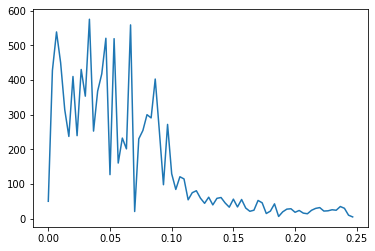

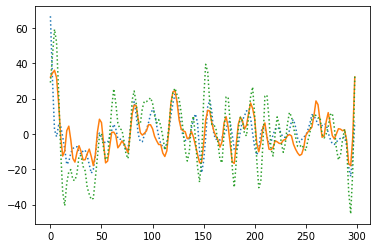

roi4_separate_sub_1802.npz


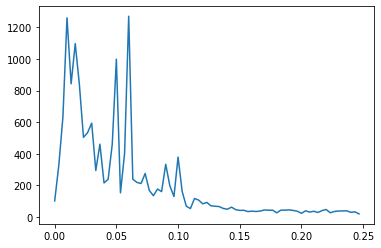

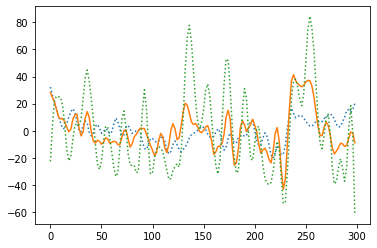

roi4_separate_sub_1940.npz


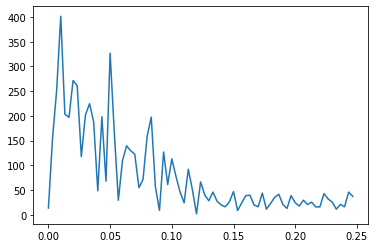

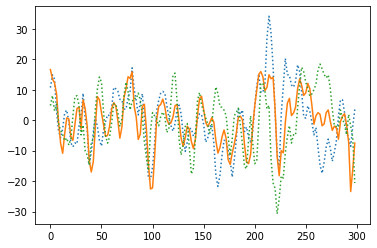

roi4_separate_sub_2164.npz


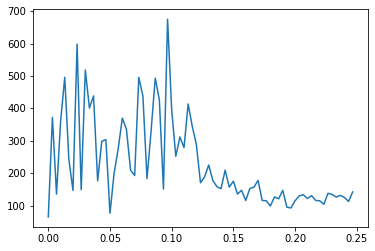

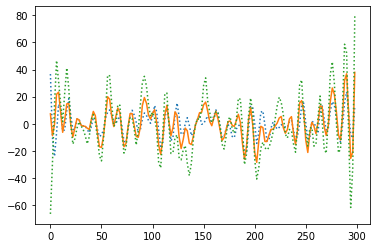

roi4_separate_sub_2276.npz


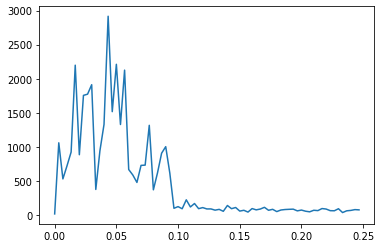

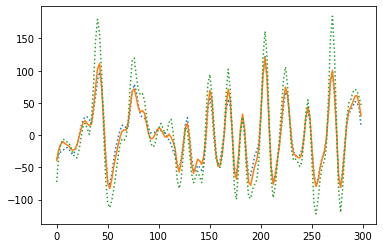

roi4_separate_sub_2238.npz


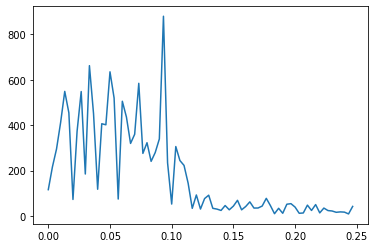

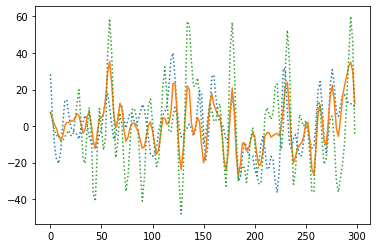

roi4_separate_sub_2278.npz


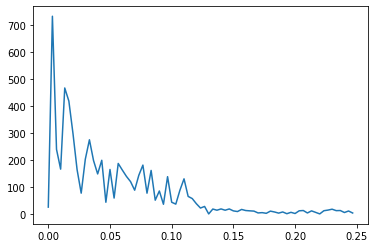

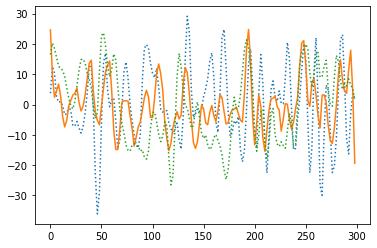

roi4_separate_sub_1814.npz


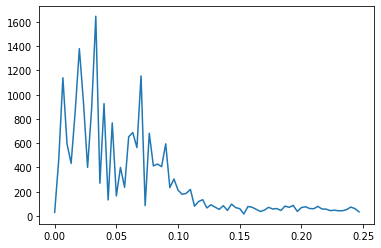

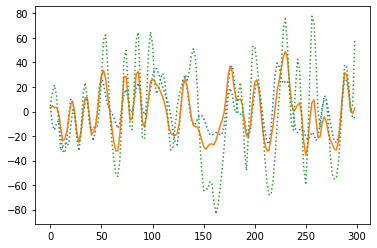

roi4_separate_sub_1764.npz


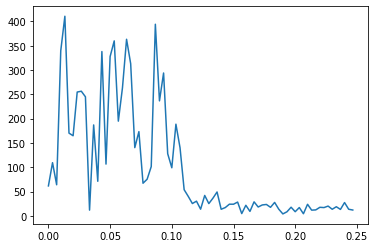

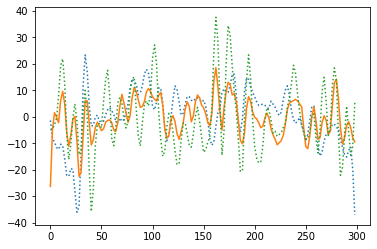

roi4_separate_sub_2027.npz


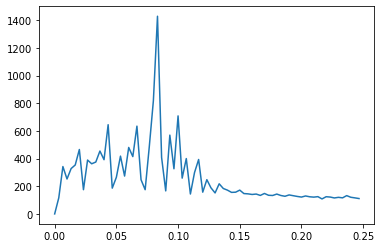

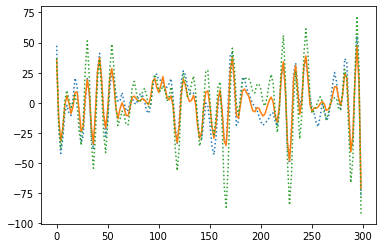

roi4_separate_sub_1585.npz


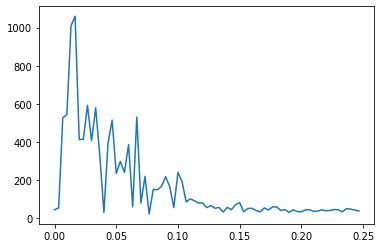

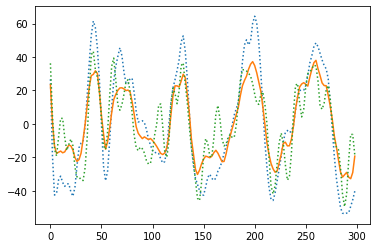

roi4_separate_sub_2267.npz


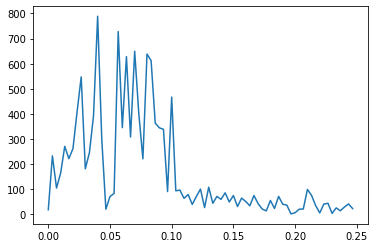

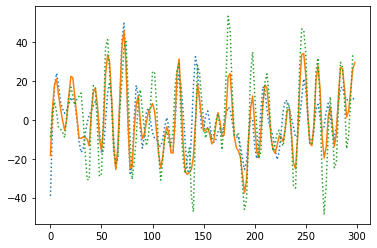

roi4_separate_sub_2277.npz


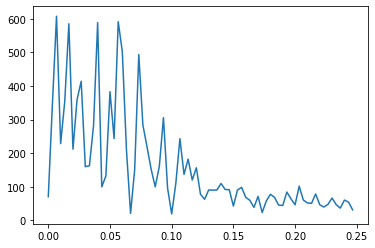

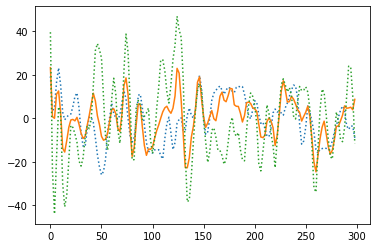

roi4_separate_sub_2303.npz


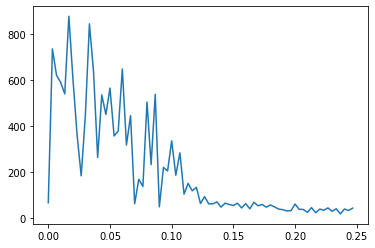

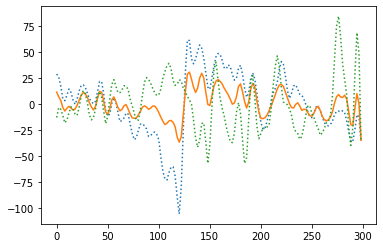

roi4_separate_sub_1854.npz


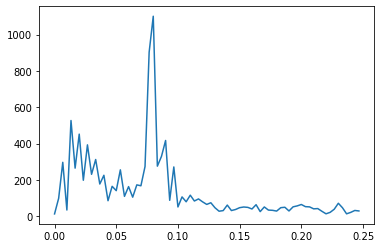

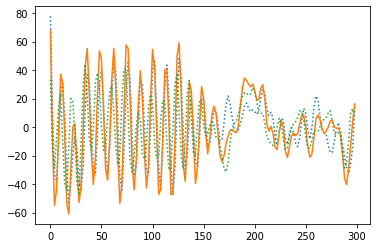

roi4_separate_sub_2072.npz


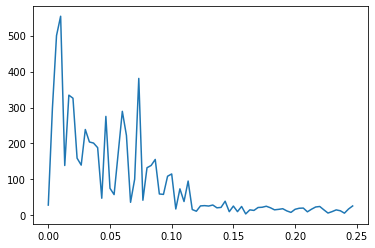

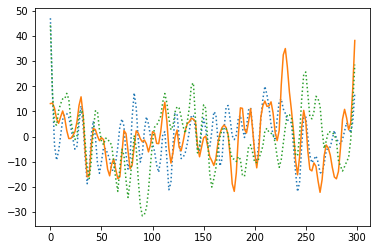

roi4_separate_sub_2235.npz


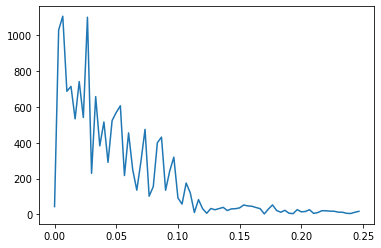

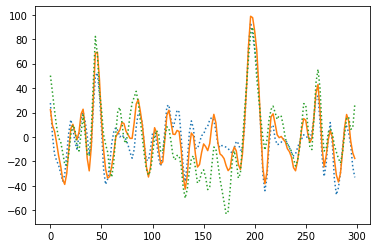

roi4_separate_sub_1876.npz


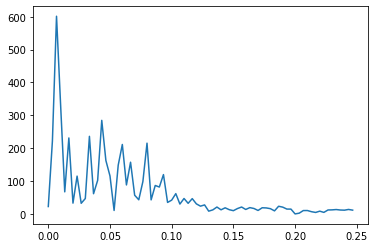

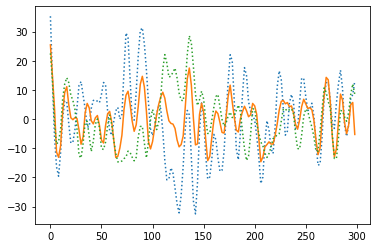

roi4_separate_sub_1903.npz


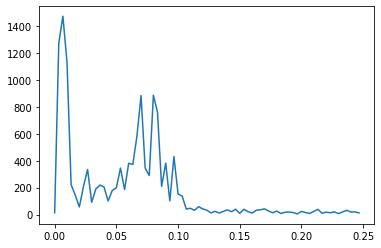

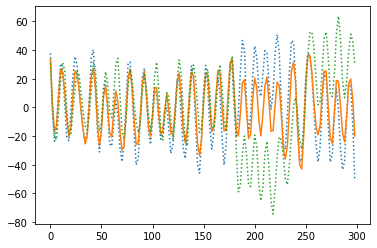

roi4_separate_sub_1738.npz


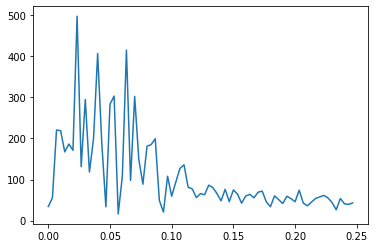

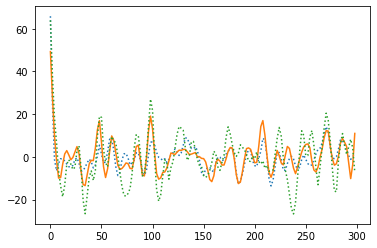

roi4_separate_sub_2291.npz


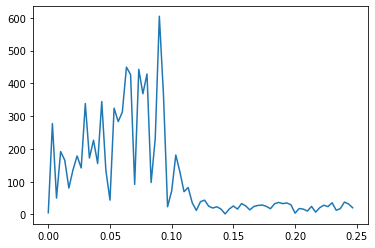

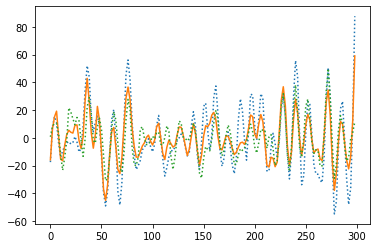

roi4_separate_sub_2008.npz


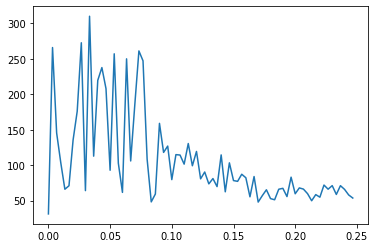

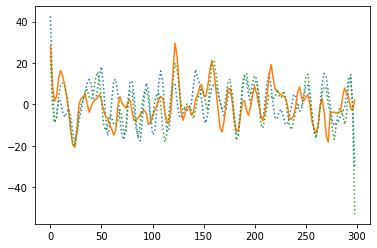

roi4_separate_sub_2308.npz


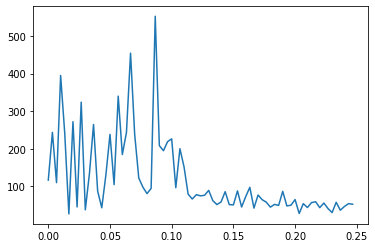

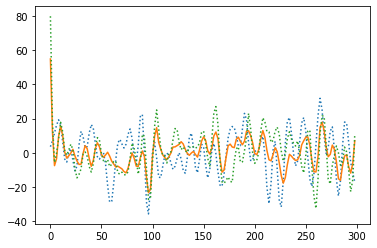

roi4_separate_sub_2121.npz


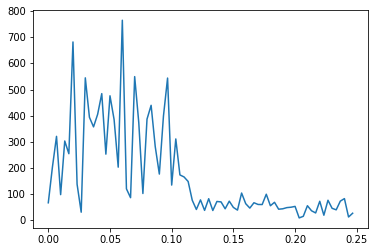

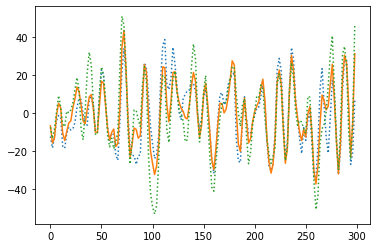

roi4_separate_sub_2060.npz


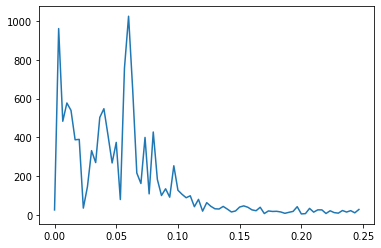

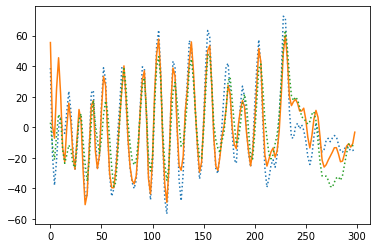

roi4_separate_sub_2198.npz


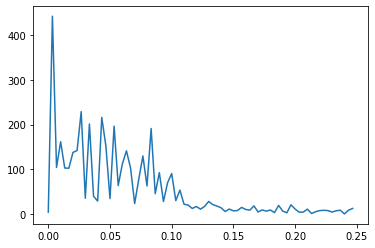

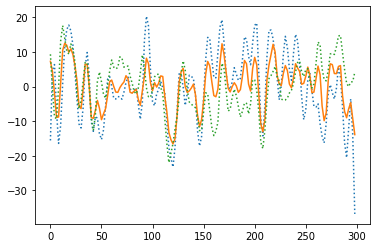

roi4_separate_sub_2260.npz


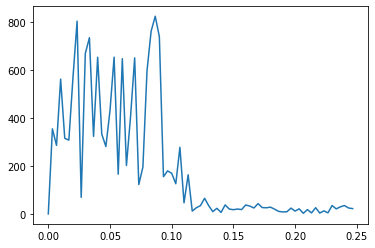

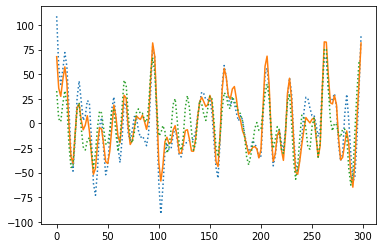

roi4_separate_sub_1899.npz


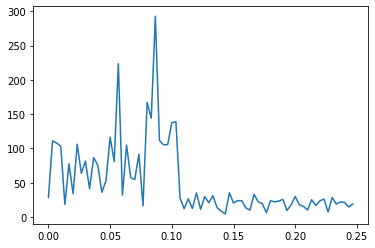

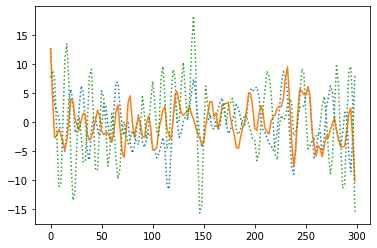

roi4_separate_sub_2154.npz


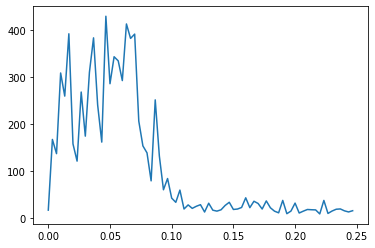

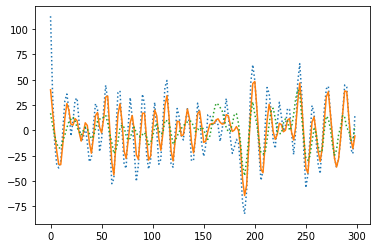

In [ ]:
flist = clist
dx = 'CN'
dxv = 0
for afile in flist:
    if afile.endswith('.npz'):
        print(afile)
        d = np.load(path0+dx+'/'+afile)
        rs1= d['roi_all_1']
        rs2= d['roi_all_2']
        rs3= d['roi_all_3']
        ts = np.arange(0,2*len(rs1),2)

        sig1_med = np.median(rs1,axis=1)
        sig2_med = np.median(rs2,axis=1)
        sig3_med = np.median(rs3,axis=1)

#        M = np.mean(sig2_med)
#       S = np.std(sig2_med)

#        sig2_med = (sig2_med-M)/S
#        sig1_med = (sig1_med-M)/S
#        sig3_med = (sig3_med-M)/S


        N=len(sig1_med)
        F = np.fft.fft(sig1_med)
        freq = np.fft.fftfreq(ts.shape[-1],2.0)
        s1_freq = np.sum(freq[:int(N/2)]*np.abs(F[:int(N/2)]))/np.sum(np.abs(F[:int(N/2)]))
        F = np.fft.fft(sig2_med)
        freq = np.fft.fftfreq(ts.shape[-1],2.0)
        s2_freq = np.sum(freq[:int(N/2)]*np.abs(F[:int(N/2)]))/np.sum(np.abs(F[:int(N/2)]))
        F = np.fft.fft(sig3_med)
        freq = np.fft.fftfreq(ts.shape[-1],2.0)
        s3_freq = np.sum(freq[:int(N/2)]*np.abs(F[:int(N/2)]))/np.sum(np.abs(F[:int(N/2)]))
        
        plt.plot(freq[:int(N/2)],np.abs(F[:int(N/2)]))
        plt.savefig('spectrum_'+dx+'_'+afile+'.png',dpi=80)
        plt.show()

        plt.plot(ts,sig1_med,':')
        plt.plot(ts,sig2_med)
        plt.plot(ts,sig3_med,':')
        plt.savefig(dx+'_'+afile+'.png',dpi=80)
        plt.show()
                
        s1_mean = np.mean(sig1_med)
        s2_mean = np.mean(sig2_med)
        s3_mean = np.mean(sig3_med)

        s1_median = np.median(sig1_med)
        s2_median = np.median(sig2_med)
        s3_median = np.median(sig3_med)
        
        s1_var = np.var(sig1_med)
        s2_var = np.var(sig2_med)
        s3_var = np.var(sig3_med)

        s1_std = np.std(sig1_med)
        s2_std = np.std(sig2_med)
        s3_std = np.std(sig3_med)

        s1_max = np.max(sig1_med)
        s2_max = np.max(sig2_med)
        s3_max = np.max(sig3_med)

        s1_min = np.min(sig1_med)
        s2_min = np.min(sig2_med)
        s3_min = np.min(sig3_med)

        s1_p095 = np.percentile(sig1_med,95)
        s2_p095 = np.percentile(sig2_med,95)
        s3_p095 = np.percentile(sig3_med,95)

        s1_p005 = np.percentile(sig1_med,5)
        s2_p005 = np.percentile(sig2_med,5)
        s3_p005 = np.percentile(sig3_med,5)

        s1_p075 = np.percentile(sig1_med,75)
        s2_p075 = np.percentile(sig2_med,75)
        s3_p075 = np.percentile(sig3_med,75)

        s1_p025 = np.percentile(sig1_med,25)
        s2_p025 = np.percentile(sig2_med,25)
        s3_p025 = np.percentile(sig3_med,25)

        ncorr12 = signal.correlate((sig1_med-np.mean(sig1_med))/(np.std(sig1_med)*len(sig1_med)),(sig2_med-np.mean(sig2_med))/(np.std(sig2_med)))
        ncorr13 = signal.correlate((sig1_med-np.mean(sig1_med))/(np.std(sig1_med)*len(sig1_med)),(sig3_med-np.mean(sig3_med))/(np.std(sig3_med)))
        ncorr23 = signal.correlate((sig2_med-np.mean(sig2_med))/(np.std(sig2_med)*len(sig2_med)),(sig3_med-np.mean(sig3_med))/(np.std(sig3_med)))

        ncorr12_delay = np.argmax(np.abs(ncorr12)) - len(sig1_med) + 1
        ncorr13_delay = np.argmax(np.abs(ncorr13)) - len(sig1_med) + 1
        ncorr23_delay = np.argmax(np.abs(ncorr23)) - len(sig1_med) + 1

        ncorr12_max = ncorr12[np.argmax(np.abs(ncorr12))]
        ncorr13_max = ncorr13[np.argmax(np.abs(ncorr13))]
        ncorr23_max = ncorr23[np.argmax(np.abs(ncorr23))]

        re = re.append({ "filename":afile,
                        "diagnosis":dxv,
                        "s1_freq":s1_freq,"s2_freq":s2_freq,"s3_freq":s3_freq,
                        "s1_mean":s1_mean,"s2_mean":s2_mean,"s3_mean":s3_mean,
                        "s1_var":s1_var,"s2_var":s2_var,"s3_var":s3_var,
                        "s1_std":s1_std,"s2_std":s2_std,"s3_std":s3_std,
                        "s1_min":s1_min,"s2_min":s2_min,"s3_min":s3_min,
                        "s1_p05":s1_p005,"s2_p05":s2_p005,"s3_p05":s3_p005,
                        "s1_p25":s1_p025,"s2_p25":s2_p025,"s3_p25":s3_p025,
                        "s1_median":s1_median,"s2_median":s2_median,"s3_median":s3_median,
                        "s1_p75":s1_p075,"s2_p75":s2_p075,"s3_p75":s3_p075,
                        "s1_p95":s1_p095,"s2_p95":s2_p095,"s3_p95":s3_p095,
                        "s1_max":s1_max,"s2_max":s2_max,"s3_max":s3_max,
                        "ncorr12_delay":ncorr12_delay,"ncorr13_delay":ncorr13_delay,"ncorr23_delay":ncorr23_delay,
                        "ncorr12_max":ncorr12_max,"ncorr13_max":ncorr13_max,"ncorr23_max":ncorr23_max 
                        }, ignore_index=True)


        


In [ ]:
re.to_csv('v202108_inf4slc_123_stat0.csv')

In [ ]:
import seaborn as sns


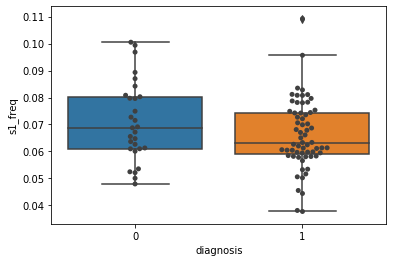

In [ ]:
xd = re["diagnosis"]
yd = re["s1_freq"]
ax = sns.boxplot(x=xd, y = yd)
ax = sns.swarmplot(x=xd, y=yd, data=re, color=".25")


In [ ]:
from scipy.fft import fft

ModuleNotFoundError: No module named 'scipy.fft'

In [ ]:
import scipy

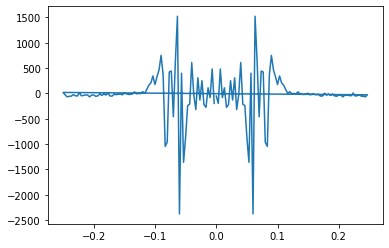

In [ ]:
N=len(sig2_med)
F = np.fft.fft(sig2_med)
freq = np.fft.fftfreq(ts.shape[-1],2.0)
plt.plot(freq,F)

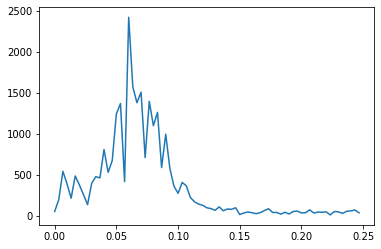

In [ ]:
plt.plot(freq[:int(N/2)],np.abs(F[:int(N/2)]))

In [ ]:
np.sum(freq[:int(N/2)]*np.abs(F[:int(N/2)]))/np.sum(np.abs(F[:int(N/2)]))

0.07081396805633124

In [ ]:
re

,filename,diagnosis,s1_freq,s2_freq,s3_freq,s1_mean,s2_mean,s3_mean,s1_var,s2_var,...,s3_p95,s1_max,s2_max,s3_max,ncorr12_delay,ncorr13_delay,ncorr23_delay,ncorr12_max,ncorr13_max,ncorr23_max
0,roi4_separate_sub_1621.npz,0,0.079731,0.062631,0.062016,0.155005,0.093118,0.332549,109.901604,120.072183,...,26.274516,66.613226,36.038484,59.213285,0,0,0,0.670243,0.642078,0.784930
1,roi4_separate_sub_1802.npz,0,0.047962,0.058012,0.055632,0.149050,-0.003742,-0.671112,89.872461,224.041868,...,52.472593,32.211969,41.337979,84.536802,0,-21,-1,0.462284,-0.302752,0.751137
2,roi4_separate_sub_1940.npz,0,0.060998,0.068528,0.069561,0.149784,-0.274711,-0.090293,97.181723,71.388853,...,14.832246,34.143065,16.628561,18.429939,0,7,0,0.692056,-0.444129,0.438663
3,roi4_separate_sub_2164.npz,0,0.089324,0.085525,0.098812,-0.000944,0.167021,-0.431921,82.412182,142.167691,...,35.608736,36.658607,37.909863,79.341800,0,1,0,0.743189,0.558814,0.866562
4,roi4_separate_sub_2276.npz,0,0.053565,0.055106,0.057690,-0.091712,-0.014152,-0.132137,1830.402716,2065.457804,...,120.100575,121.863646,120.463657,184.470045,0,0,0,0.986842,0.958523,0.981199
5,roi4_separate_sub_2238.npz,0,0.061299,0.057565,0.067653,0.030744,0.172145,-0.771361,209.728003,165.986956,...,41.000647,40.011160,35.405860,60.123508,0,-1,0,0.638823,0.267908,0.736548
6,roi4_separate_sub_2278.npz,0,0.069126,0.086957,0.051874,-0.094127,0.009899,-0.181660,150.594264,71.197285,...,18.416751,29.127989,24.747296,23.658540,1,-3,0,0.521059,-0.327835,0.428215
7,roi4_separate_sub_1814.npz,0,0.050071,0.050551,0.061889,-0.056889,-0.649331,-0.199104,309.263182,388.130372,...,58.690414,39.539993,49.142777,77.692497,0,0,0,0.838240,0.534201,0.799345
8,roi4_separate_sub_1764.npz,0,0.068776,0.072369,0.066232,0.056597,-0.234074,-0.410318,112.112146,53.057690,...,21.977553,23.327404,18.539950,37.567532,0,-11,0,0.471401,0.240868,0.657527
9,roi4_separate_sub_2027.npz,0,0.099373,0.102134,0.095739,-0.081971,0.037628,-0.002007,449.447130,319.814937,...,38.733395,55.330797,47.725277,71.893789,0,0,0,0.944530,0.809619,0.908800
